In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Read data

In [4]:
seeds = pd.read_csv("data/seeds.csv", header=None)
seeds.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Make a feature matrix and a class vector

In [5]:
X = seeds.loc[:,0:6].values
y = seeds.loc[:,7]
y_str = y.apply(lambda x: "Kama Wheat" if x == 1 else "Rosa Wheat" if x== 2 else "Canadian Wheat" )

### Check thre distribution of classes in the dataset

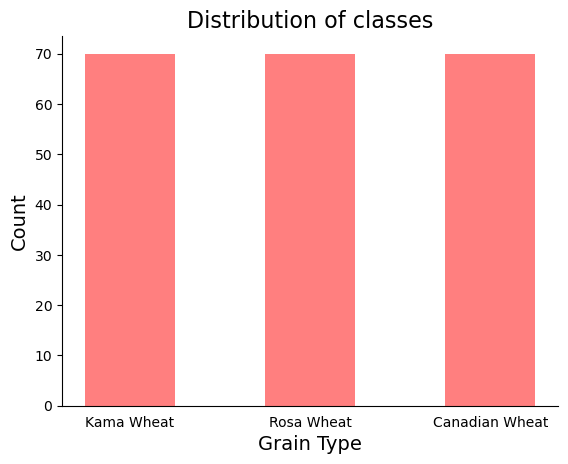

In [6]:
# Show distribution of target
g = sns.histplot(y, discrete= True, shrink=.5, color = 'red', alpha = 0.5, edgecolor='None')
g.set_xticks(y.unique()) 
g.set_xticklabels(y_str.unique()) 
sns.despine(right=True, top=True)
g.set_xlabel("Grain Type", fontsize=14)
g.set_ylabel("Count", fontsize=14)
plt.title('Distribution of classes', fontsize=16)
g.tick_params(bottom=False)
plt.show()

### Determine number of cluster

Choose a good number of clusters using the k-means inertia graph. 

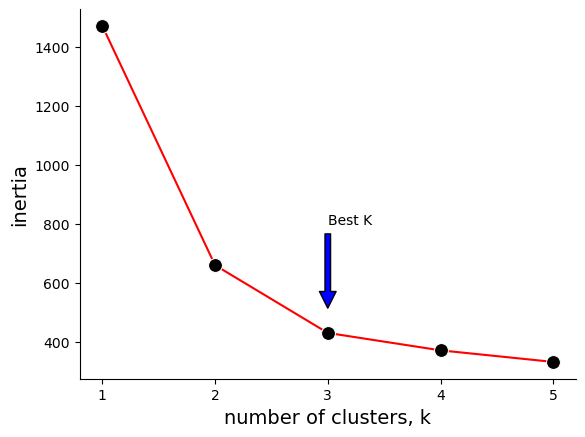

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:  
    steps = [("scaler", StandardScaler()),
             ("kmeans", KMeans(n_clusters=k))]

    # Create the pipeline
    pipeline = Pipeline(steps)

    # Fit the pipeline to samples
    pipeline.fit(X)

    pipeline.named_steps['kmeans'].inertia_

    # Append the inertia to the list of inertias
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
    
# Plot ks vs inertias
g = sns.lineplot(x=ks, y=inertias, marker="o", c="red", markersize=10, markerfacecolor='black')
sns.despine(right=True, top=True)
g.set_xlabel("number of clusters, k", fontsize=14)
g.set_ylabel("inertia", fontsize=14)
g.set_xticks(ks)

g.annotate('Best K', xy=(3, 500), xytext=(3, 800),
            arrowprops=dict(facecolor='blue', shrink=0.05),
            )

plt.show()


### Cluster and evaluate

In [8]:
steps = [("scaler", StandardScaler()),
        ("kmeans", KMeans(n_clusters=3))]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({
    'labels': ["Kama Wheat" if x == 1 else "Rosa Wheat" if x== 2 else "Canadian Wheat" for x in labels],
    'varieties': y_str})

# Create crosstab: ct
ct = pd.crosstab(df["labels"], df["varieties"])

# Display ct
print(ct)


varieties       Canadian Wheat  Kama Wheat  Rosa Wheat
labels                                                
Canadian Wheat               0           2          65
Kama Wheat                  66           6           0
Rosa Wheat                   4          62           5
